# Data Analytics Fundamentals Project 6
## - Company Workforce Exploratory Data Analysis -
### Eric Meyer
### 2/18/2023
### -----------------------------------------------------------------------------------------------------------------------------

#### HR Executive Team Questions:
-  Recruiting & Performance:
    -  Where should our HR professionals focus their recruiting efforts?
        -  Which recruiting platform brings in the most candidates?
        -  What is the performance of candidates from each recruiting platform like?
### -----------------------------------------------------------------------------------------------------------------------------

#### Importing libraries

In [2]:
import math
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing custom functions for eda
import eda_functions as myf

#### Loading human resources data set as DataFrame

In [3]:
df = pd.read_csv('human_resources.csv', index_col=1)

In [4]:
df

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",0,0,1,1,5,3,0,65893,0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
10301,"Ybarra, Catherine",0,0,0,5,5,1,0,48513,1,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
10010,"Zamora, Jennifer",0,0,0,1,3,4,0,220450,0,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16


#### Exploring data with custom functions module (eda_functions as myf)

In [5]:
# using this data analysis to identify what data is available and needed to anwser executive team's questions
myf.eda()

Top 5 rows of data:

                  Employee_Name  MarriedID  MaritalStatusID  GenderID  \
EmpID                                                                   
10026       Adinolfi, Wilson  K          0                0         1   
10084  Ait Sidi, Karthikeyan             1                1         1   
10196         Akinkuolie, Sarah          1                1         0   
10088              Alagbe,Trina          1                1         0   
10069          Anderson, Carol           0                2         0   

       EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  \
EmpID                                                                     
10026            1       5            4                       0   62506   
10084            5       3            3                       0  104437   
10196            5       5            3                       0   64955   
10088            1       5            3                       0   64991   
10069            

### -----------------------------------------------------------------------------------------------------------------------------
#### (1) Recruitment source data analysis (describe, unique values, value counts, etc.)

In [6]:
df.RecruitmentSource

EmpID
10026             LinkedIn
10084               Indeed
10196             LinkedIn
10088               Indeed
10069        Google Search
               ...        
10135             LinkedIn
10301        Google Search
10010    Employee Referral
10043    Employee Referral
10271             LinkedIn
Name: RecruitmentSource, Length: 311, dtype: object

In [7]:
df['RecruitmentSource'].describe()

count        311
unique         9
top       Indeed
freq          87
Name: RecruitmentSource, dtype: object

In [8]:
df['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

In [9]:
df['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [10]:
# creating a list from recruitment source column
rec_list = (df.RecruitmentSource)

rec_list

EmpID
10026             LinkedIn
10084               Indeed
10196             LinkedIn
10088               Indeed
10069        Google Search
               ...        
10135             LinkedIn
10301        Google Search
10010    Employee Referral
10043    Employee Referral
10271             LinkedIn
Name: RecruitmentSource, Length: 311, dtype: object

In [11]:
# creating a dataframe from recruitment source list
rec_df = pd.DataFrame(rec_list)

rec_df

,RecruitmentSource
EmpID,
10026,LinkedIn
10084,Indeed
10196,LinkedIn
10088,Indeed
10069,Google Search
...,...
10135,LinkedIn
10301,Google Search
10010,Employee Referral


#### Recruitment source data visualization with seaborn

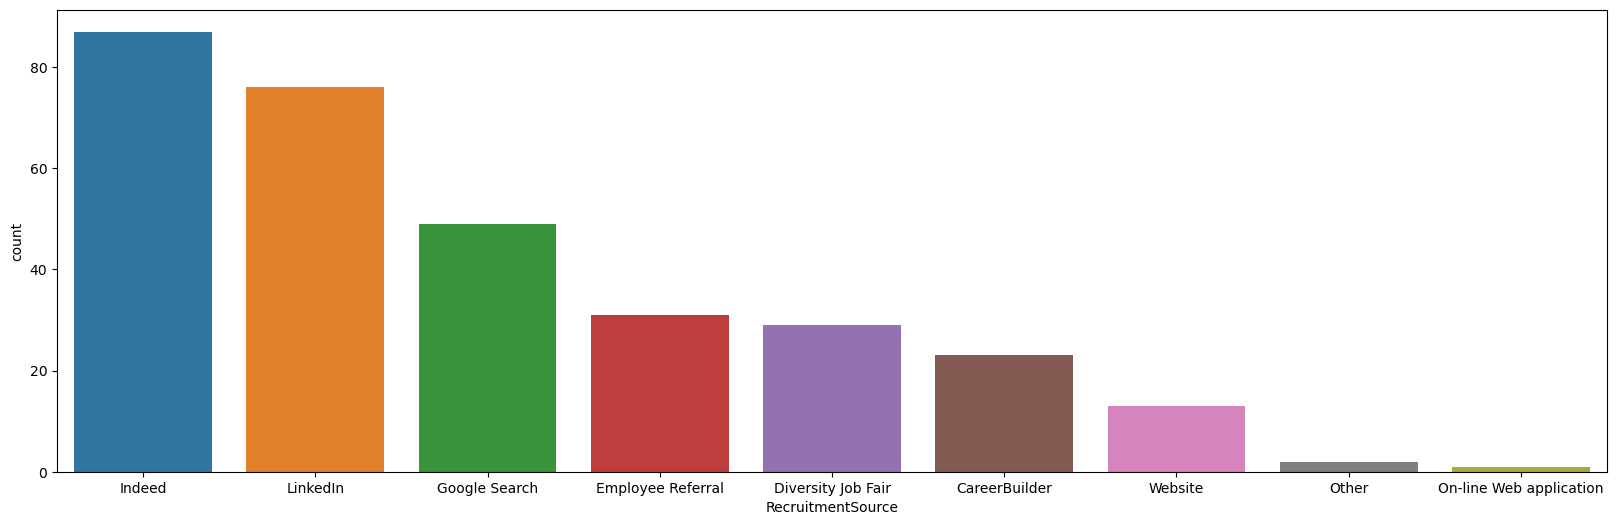

In [12]:
# BONUS: learning the use of seaborn countplot for data visualization in python

plt.figure(figsize=(20,6))
sns.countplot(x = 'RecruitmentSource', data=df, order=df['RecruitmentSource'].value_counts().index)
plt.show()

#### Recruitment source data summary (value counts, len, list, for loop, etc.)

In [29]:
# using value_counts() and len() built in functions to calculate percentage of candidates from top 4 sources
perc_indeed = ((df['RecruitmentSource'].value_counts()['Indeed']) / len(df['RecruitmentSource'])) * 100
perc_linkedin = ((df['RecruitmentSource'].value_counts()['LinkedIn']) / len(df['RecruitmentSource'])) * 100
perc_google = ((df['RecruitmentSource'].value_counts()['Google Search']) / len(df['RecruitmentSource'])) * 100
perc_referral = ((df['RecruitmentSource'].value_counts()['Employee Referral']) / len(df['RecruitmentSource'])) * 100
perc_diversityjob = ((df['RecruitmentSource'].value_counts()['Diversity Job Fair']) / len(df['RecruitmentSource'])) * 100

# creating a list from top 4 recruiting methods percentages and totaling that percent
top5_sum = 0
for x in [perc_indeed, perc_linkedin, perc_google, perc_referral, perc_diversityjob]:
    top5_sum = top5_sum + x

print(f'{perc_indeed:.1f}% of candidates come from the Indeed job board.')
print(f'{perc_linkedin:.1f}% of candidates come from the LinkedIn job board.')
print(f'{perc_google:.1f}% of candidates come from a Google Search.')
print(f'{perc_referral:.1f}% of candidates come from a Employee Referral.')
print(f'{perc_diversityjob:.1f}% of candidates come from the Diversity Job Fair.')
print()
print(f'Sum of the top 5 recruiting methods (Indeed, LinkedIn, Google Search, Employee Referral, and Diversity Job Fair) is {top5_sum:.0f}%!')

28.0% of candidates come from the Indeed job board.
24.4% of candidates come from the LinkedIn job board.
15.8% of candidates come from a Google Search.
10.0% of candidates come from a Employee Referral.
9.3% of candidates come from the Diversity Job Fair.

Sum of the top 5 recruiting methods (Indeed, LinkedIn, Google Search, Employee Referral, and Diversity Job Fair) is 87%!


### -----------------------------------------------------------------------------------------------------------------------------
#### (2) Performance score data analysis (describe, unique values, lists, dataframes, mapping, etc.)

In [14]:
df.PerformanceScore

EmpID
10026        Exceeds
10084    Fully Meets
10196    Fully Meets
10088    Fully Meets
10069    Fully Meets
            ...     
10135    Fully Meets
10301            PIP
10010        Exceeds
10043    Fully Meets
10271    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [15]:
df['PerformanceScore'].describe()

count             311
unique              4
top       Fully Meets
freq              243
Name: PerformanceScore, dtype: object

In [16]:
df['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [17]:
# creating a list from performance score column
perf_str_list = (df.PerformanceScore)

perf_str_list

EmpID
10026        Exceeds
10084    Fully Meets
10196    Fully Meets
10088    Fully Meets
10069    Fully Meets
            ...     
10135    Fully Meets
10301            PIP
10010        Exceeds
10043    Fully Meets
10271    Fully Meets
Name: PerformanceScore, Length: 311, dtype: object

In [18]:
# creating a dataframe from performance score list of strings
perf_str_df = pd.DataFrame(perf_str_list)

perf_str_df

,PerformanceScore
EmpID,
10026,Exceeds
10084,Fully Meets
10196,Fully Meets
10088,Fully Meets
10069,Fully Meets
...,...
10135,Fully Meets
10301,PIP
10010,Exceeds


In [19]:
# using map() function to transform performance score strings to quantitative values for analysis (4 being the best score and 1 being the lowest score)
perf_str_df['PerformanceScore'] = df.PerformanceScore.map({'Exceeds': 4, 'Fully Meets': 3, 'Needs Improvement': 2, 'PIP': 1})

perf_str_df # BE CAREFUL -- even though this variable still says 'str' these are now integers after mapping

,PerformanceScore
EmpID,
10026,4
10084,3
10196,3
10088,3
10069,3
...,...
10135,3
10301,1
10010,4


In [20]:
# creating list from new numerical values performance scores dataframe
num_perf_list = (perf_str_df.PerformanceScore)

num_perf_list

EmpID
10026    4
10084    3
10196    3
10088    3
10069    3
        ..
10135    3
10301    1
10010    4
10043    3
10271    3
Name: PerformanceScore, Length: 311, dtype: int64

#### Performance score data visualization with seaborn

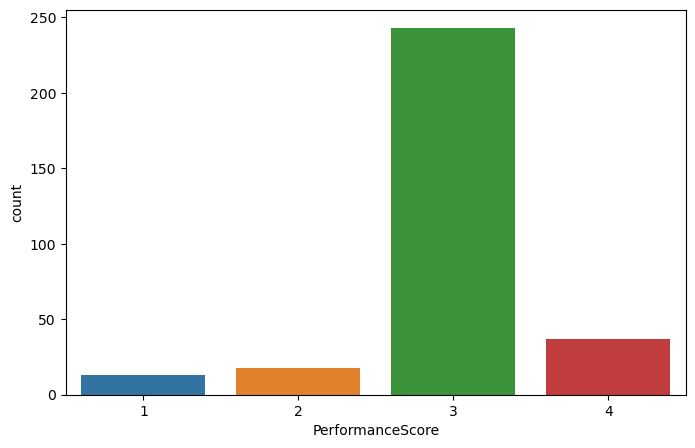

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'PerformanceScore', data=perf_str_df)
plt.show()

#### Performance score data summary (value counts, len, list, etc.)

In [22]:
# using value_counts() and len() built in functions to calculate percentage of candidates from top 4 sources
perc_one = ((perf_str_df['PerformanceScore'].value_counts()[1]) / len(perf_str_df['PerformanceScore'])) * 100
perc_two = ((perf_str_df['PerformanceScore'].value_counts()[2]) / len(perf_str_df['PerformanceScore'])) * 100
perc_three = ((perf_str_df['PerformanceScore'].value_counts()[3]) / len(perf_str_df['PerformanceScore'])) * 100
perc_four = ((perf_str_df['PerformanceScore'].value_counts()[4]) / len(perf_str_df['PerformanceScore'])) * 100

print(f'{perc_one:.1f}% of employees are rated at a level 1 performance score.')
print(f'{perc_two:.1f}% of employees are rated at a level 2 performance score.')
print(f'{perc_three:.1f}% of employees are rated at a level 3 performance score.')
print(f'{perc_four:.1f}% of employees are rated at a level 4 performance score.')

4.2% of employees are rated at a level 1 performance score.
5.8% of employees are rated at a level 2 performance score.
78.1% of employees are rated at a level 3 performance score.
11.9% of employees are rated at a level 4 performance score.


### -----------------------------------------------------------------------------------------------------------------------------
#### (3) Comparing candidate's performance level vs what recruitment source was used

In [23]:
# zipping together recruiting source list for each row of data and performance score list for each row of data
zip_rec_perf = list(zip(rec_list, num_perf_list))

In [24]:
# converting newly created recruiting source and performance score list to dataframe
rec_perf_df = pd.DataFrame(zip_rec_perf, columns=['RecruitingSource', 'PerformanceScore'])

rec_perf_df

,RecruitingSource,PerformanceScore
0,LinkedIn,4
1,Indeed,3
2,LinkedIn,3
3,Indeed,3
4,Google Search,3
...,...,...
306,LinkedIn,3
307,Google Search,1
308,Employee Referral,4
309,Employee Referral,3


In [25]:
# creating an object that groups rows based on wich recruiting source candidates came from
rec_source_perf_score = rec_perf_df['PerformanceScore'].groupby(rec_perf_df['RecruitingSource'])

In [26]:
# calculating the average performance score of the grouped candidates for each recruiting source
rec_source_perf_score.mean()

RecruitingSource
CareerBuilder              2.913043
Diversity Job Fair         3.000000
Employee Referral          3.096774
Google Search              2.938776
Indeed                     2.977011
LinkedIn                   3.000000
On-line Web application    3.000000
Other                      3.000000
Website                    2.769231
Name: PerformanceScore, dtype: float64

#### Recruiting source vs candidate performance level data summary

In [30]:
# creating recruiting source vs average performance score dataframe
final_rec_vs_perf_df = pd.DataFrame(rec_source_perf_score.mean())

# printing recruiting source vs average performance score dataframe in descending order for easy analysis
final_rec_vs_perf_df.sort_values(by=['PerformanceScore'], ascending=False)

,PerformanceScore
RecruitingSource,
Employee Referral,3.096774
Diversity Job Fair,3.000000
LinkedIn,3.000000
On-line Web application,3.000000
Other,3.000000
Indeed,2.977011
Google Search,2.938776
CareerBuilder,2.913043
Website,2.769231


### -----------------------------------------------------------------------------------------------------------------------------
#### HR Executive Team Questions: Data Findings
-  Recruiting & Performance:
    -  Where should our HR professionals focus their recruiting efforts?
        -  Which recruiting platform brings in the most candidates?
            -  The top five recruiting sources for quantity of candidates in order are:
                -  Indeed (28%)
                -  LinkedIn (24.4%)
                -  Google Search (15.8%)
                -  Employee Referral (10%)
                -  Diversity Job Fair (9.3%)
            -  These top five sources bring in 87% of candidates
        -  What is the performance of candidates from each recruiting platform like?
            -  The top four recruiting sources for quality (1.00 - 4.00) of candidates in order are:
                -  Employee Referral (3.09)
                -  Diversity Job Fair (3.00)
                -  LinkedIn (3.00)
                -  Online Web Application (3.00)
                -  Other (3.00)
### -----------------------------------------------------------------------------------------------------------------------------
#### My Conclusions:
Overall I would say that the HR team is doing well with their talent strategy. Here are a couple main takeways/recommendations:

1.  We must continue to post roles on Indeed and LinkedIn first. 52% of employees end up coming from these two platforms. This is a huge chunk of our workforce.
2.  Increase LinkedIn's usage slightly more than Indeed if possible. LinkedIn candidates perform slightly better at a 3.00 level while Indeed candidates are at 2.98.
3.  Make sure to have a solid employee referral bonus program established. Candidates from employee referrals have the best performance level overall at 3.09.
4.  Potentially increase efforts at the Diversity Job Fair as this is the fifth best source for candidates. These candidates tie for second as far as performance level.

Great job HR team! (90% of all candidates hired are above a 3.00 performance score)